# Desafio para o processo seletivo Murabei

**Candidato:** Luis Gustavo de Souza Oliveira  
**Data de entrega:** 03/02/2023

## 1. Entendendo o desafio

### 1.1 Objetivos

* Manter um código limpo e organizado
* Realizar *tratamento dos dados* e a *modelagem* que caracteriza as escolas segundo o exame
* Levantar discussão da eficiência pelos parâmetros do modelo
* Prever o resultado no normexam pelas características de alunos e escolas
* Responder qual tipo de escola é mais eficiente na formação dos alunos pelo resultado do exame

### 1.2 Dados fornecidos

| variável | descrição |
--------- | :--------
| school ns | id da escola |
| normexam ne | nota no exame normalizado |
| schgend cs | gênero da escola |
| schavg ns | média escolar da pontuação de admissão |
| vr ce | faixa de pontuação de raciocínio verbal no nível do aluno na admissão |
| intake ce | faixa de pontuação de admissão do aluno |
| standLRT ne | pontuação do teste LR padronizado |
| sex ce | sexo do estudante - dentre "F" e "M" |
| type cs | tipo de escola |
| student ne | id do aluno (dentro da escola) |

* ns (numérica escola), ne (numérica estudante), cs (categórica escola), ce (categórica estudante)
* Segundo a tabela, tem-se 5 variáveis numéricas e 5 variáveis categóricas. 
* A base de dados são extraídas a partir dos seguintes diretorios (modifique conforme necessidade):

In [1]:
dir_cat_school_data = "../dataset/cat_school_data.csv"
dir_cat_student_data = "../dataset/cat_student_data.csv"
dir_num_school_data = "../dataset/num_school_data.csv"
dir_num_student_data = "../dataset/num_student_data.csv"

dir_school_student_data_merged = "../dataset/school_student_data_merged.csv"
separator = ";"

### 1.3 Bibliotecas necessárias

* numpy: necessidade de manipulação de arrays numéricas
* pandas: manipulação de dados tabulados
* matplotlib: para geração de indicadores e gráficos

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Organização do código

* Por padrão, todas as variáveis do código terão o estilo snake_case
* Dataframes terão o prefixo *df*
* Arrays terão o prefixo *arr*
* Estruturas auxiliares terão o prefixo *aux*. Exemplo: para limpeza de dados, para geração de gráficos
* Todos os passos implementados serão acompanhados por tópicos (em * ) e comentários (em #)

## 3. Carregamento e pré-processamento dos dados

3.1 Primeiramente, os dados serão carregados a partir das bases fornecidas

In [4]:
df_cat_school_data = pd.read_csv(dir_cat_school_data, sep=separator)
df_cat_student_data = pd.read_csv(dir_cat_student_data, sep=separator)
df_num_school_data = pd.read_csv(dir_num_school_data, sep=separator)
df_num_student_data = pd.read_csv(dir_num_student_data, sep=separator)

3.2 O próximo passo é tratar os dados duplicados e transformar os datasets para o formato Wide

#### Variáveis categóricas que são aplicadas às escolas

In [353]:
print(df_cat_school_data)
print("\nTipo de dados do DataFrame:\n"+ str(df_cat_school_data.dtypes))

# Verificando se existem linhas com dados ausentes ou duplicadas

aux_isNaN = df_cat_school_data.isna()
print("\nTotal de linhas com dados ausentes:\n" + str(aux_isNaN.sum()))

aux_duplicated = df_cat_school_data[["school","variable"]].duplicated()
print("\nTotal de linhas semelhantes: " + str(aux_duplicated.sum()))

# Transformando o dataset para o formato wide

df_cat_school_data_wide = pd.pivot(df_cat_school_data, index='school', columns='variable', values='value')
print("\nTipo de dados após a conversão em Wide:\n"+ str(df_cat_school_data_wide.dtypes))
df_cat_school_data_wide

     school variable  value
0         1  schgend  mixed
1         2  schgend  girls
2         3  schgend  mixed
3         4  schgend  mixed
4         5  schgend  mixed
..      ...      ...    ...
125      61     type    Mxd
126      62     type    Mxd
127      63     type    Mxd
128      64     type   Sngl
129      65     type   Sngl

[130 rows x 3 columns]

Tipo de dados do DataFrame:
school       int64
variable    object
value       object
dtype: object

Total de linhas com dados ausentes:
school      0
variable    0
value       0
dtype: int64

Total de linhas semelhantes: 0

Tipo de dados após a conversão em Wide:
variable
schgend    object
type       object
dtype: object


variable,schgend,type
school,,
1,mixed,Mxd
2,girls,Sngl
3,mixed,Mxd
4,mixed,Mxd
5,mixed,Mxd
...,...,...
61,mixed,Mxd
62,mixed,Mxd
63,mixed,Mxd


#### Variáveis numéricas que são aplicadas às escolas

In [355]:
print(df_num_school_data)
print("\nTipo de dados do DataFrame:\n"+ str(df_num_school_data.dtypes))

# Verificando se existem linhas com dados ausentes ou duplicadas

aux_isNaN = df_num_school_data.isna()
print("\nTotal de linhas com dados ausentes:\n" + str(aux_isNaN.sum()))

aux_duplicated = df_num_school_data[["school","variable"]].duplicated()
print("\nTotal de linhas semelhantes: " + str(aux_duplicated.sum()))

# Transformando o dataset para o formato wide

df_num_school_data_wide = pd.pivot(df_num_school_data, index="school", columns="variable", values="value")

# Por padrão, o dataset tinha sua coluna value no formato de objeto
# Logo foi necessário substituir a vírgula por ponto para converter posteriormente em float
df_num_school_data_wide["schavg"] = df_num_school_data_wide["schavg"].str.replace(",",".").astype(float)
print("\nTipo de dados após a conversão:\n"+ str(df_num_school_data_wide.dtypes))

df_num_school_data_wide


    school variable      value
0        1   schavg  0,1661752
1        2   schavg  0,3951492
2        3   schavg  0,5141552
3        4   schavg  0,0917642
4        5   schavg  0,2105252
..     ...      ...        ...
60      61   schavg  -0,020198
61      62   schavg  0,1673862
62      63   schavg  0,1562112
63      64   schavg  0,4341442
64      65   schavg   -0,23535

[65 rows x 3 columns]

Tipo de dados do DataFrame:
school       int64
variable    object
value       object
dtype: object

Total de linhas com dados ausentes:
school      0
variable    0
value       0
dtype: int64

Total de linhas semelhantes: 0

Tipo de dados após a conversão:
variable
schavg    float64
dtype: object


variable,schavg
school,
1,0.166175
2,0.395149
3,0.514155
4,0.091764
5,0.210525
...,...
61,-0.020198
62,0.167386
63,0.156211


#### Variáveis categóricas que são aplicadas aos estudantes

In [365]:
print(df_cat_student_data)
print("\nTipo de dados do DataFrame:\n"+ str(df_cat_student_data.dtypes))

# Verificando se existem linhas com dados ausentes ou duplicados

aux_isNaN = df_cat_student_data.isna()
print("\nTotal de linhas com dados ausentes:\n" + str(aux_isNaN.sum()))
aux_equal = df_cat_student_data[["school","student","variable","value"]].duplicated()
print("\nTotal de linhas semelhantes: " + str(aux_equal.sum()))

# Verificando quais são as linhas semelhantes e mantendo UMA OCORRÊNCIA DE CADA
# Linhas semelhantes são aquelas onde em ambas os dados são totalmente idênticos 

aux_without_equal = df_cat_student_data[~aux_equal]

# Verificando se existem linhas duplicadas e eliminando TODAS AS OCORRÊNCIAS
# Linhas duplicadas são aquelas onde um mesmo id aparece mais de uma vez associado a informações diferentes

aux_duplicated = aux_without_equal[["school","student","variable"]].duplicated(keep=False)
print("\nTotal de linhas duplicadas: " + str(aux_duplicated.sum()))
aux_without_duplicated = aux_without_equal[~aux_duplicated]

print("\nDataFrame sem linhas com dados ausentes ou duplicadas\n" + str(aux_without_duplicity))

# Neste momento foram retirados todas as linhas semelhantes e aquelas duplicadas (em aux_without_duplicated)
# Observa-se que o Dataframe perdeu 14 linhas (10 pares que eram semelhantes e 2 pares duplicadas)

# Transformando o dataset para o formato wide

df_cat_student_data_wide = pd.pivot(aux_without_duplicated, index=["school","student"], columns="variable", values="value")
df_cat_student_data_wide

       school  student variable       value
1           1      143   intake  bottom 25%
2           1      145   intake     mid 50%
3           1      142   intake     top 25%
4           1      141   intake     mid 50%
5           1      138   intake     mid 50%
...       ...      ...      ...         ...
12173      65       46       vr     mid 50%
12174      65       59       vr     mid 50%
12175      65       60       vr     mid 50%
12176      65       61       vr     mid 50%
12177      65       56       vr     mid 50%

[11828 rows x 4 columns]

Tipo de dados do DataFrame:
school       int64
student      int64
variable    object
value       object
dtype: object

Total de linhas com dados ausentes:
school      0
student     0
variable    0
value       0
dtype: int64

Total de linhas semelhantes: 10

Total de linhas duplicadas: 4

DataFrame sem linhas com dados ausentes ou duplicadas
       school  student variable       value
1           1      143   intake  bottom 25%
2           1 

variable            intake sex       vr
school student                         
1      1        bottom 25%   F  mid 50%
       4           mid 50%   F  mid 50%
       6           mid 50%   M  mid 50%
       7           top 25%   M  mid 50%
       13          mid 50%   M  mid 50%
...                    ...  ..      ...
65     148         mid 50%   F  mid 50%
       152      bottom 25%   F  mid 50%
       153         top 25%   F  mid 50%
       154         mid 50%   F  mid 50%
       155         mid 50%   F  mid 50%

[4010 rows x 3 columns]

#### Variáveis numéricas que são aplicadas aos estudantes

In [374]:
print(df_num_student_data)
print("\nTipo de dados do DataFrame:\n"+ str(df_num_student_data.dtypes))

# Verificando se existem linhas com dados ausentes ou duplicados

aux_isNaN = df_num_student_data.isna()
print("\nTotal de linhas com dados ausentes:\n" + str(aux_isNaN.sum()))

aux_equal = df_num_student_data[["school","student","variable","value"]].duplicated()
print("\nTotal de linhas semelhantes: " + str(aux_equal.sum()))

# Verificando quais são as linhas semelhantes e mantendo UMA OCORRÊNCIA DE CADA

aux_without_equal = df_num_student_data[~aux_equal]

# Verificando se existem linhas duplicadas e eliminando TODAS AS OCORRÊNCIAS

aux_duplicated = aux_without_equal[["school","student","variable"]].duplicated(keep=False)
print("\nTotal de duplicidade: " + str(aux_duplicated.sum()))
aux_without_duplicated = aux_without_equal[~aux_duplicated]

# Excluindo as linhas com dados ausentes
print("\nTotal de dados ausentes NaN: " + str(aux_without_duplicated.isna().sum().sum()))
aux_without_NaN = aux_without_duplicated.dropna(axis=0)
aux_without_NaN = aux_without_NaN.astype({"student": int})
print("\n"+str(aux_without_NaN))

# Neste momento foram retirados todas as linhas semelhantes, duplicadas e com valores ausentes
# Observa-se que o Dataframe perdeu 205 linhas (2 pares semelhantes, 35 pares com duplicidade e 133 ausentes)

# Transformando o dataset para o formato wide

df_num_student_data_wide = pd.pivot(aux_without_NaN, index=["school","student"], columns="variable", values="value")

# Por padrão, o dataset tinha seus dados no formato em string
# Logo foi necessário substituir a vírgula por ponto para converter os valores em ponto flutuante
df_num_student_data_wide["standLRT"] = df_num_student_data_wide["standLRT"].str.replace(",",".").astype(float)
df_num_student_data_wide["normexam"] = df_num_student_data_wide["normexam"].str.replace(",",".").astype(float)
print("\nTipo de dados após a conversão:\n"+ str(df_num_student_data_wide.dtypes))

df_num_student_data_wide

      school  student  variable      value
1          1    143.0  normexam  0,2613242
2          1    145.0  normexam  0,1340672
3          1    142.0  normexam  -1,723882
4          1    141.0  normexam  0,9675862
5          1    138.0  normexam  0,5443412
...      ...      ...       ...        ...
8114      65     46.0  standLRT  1,8588312
8115      65     59.0  standLRT   -1,03397
8116      65     60.0  standLRT  0,4537562
8117      65     61.0  standLRT  -0,786016
8118      65     56.0  standLRT  -1,364576

[8118 rows x 4 columns]

Tipo de dados do DataFrame:
school        int64
student     float64
variable     object
value        object
dtype: object

Total de linhas com dados ausentes:
school        0
student      90
variable      0
value       101
dtype: int64

Total de linhas semelhantes: 2

Total de duplicidade: 70

Total de dados ausentes NaN: 133

      school  student  variable      value
1          1      143  normexam  0,2613242
2          1      145  normexam  0,1340672


variable        normexam  standLRT
school student                    
1      1        1.506185  0.784362
       4       -0.555112 -1.033970
       6       -1.335315 -0.951318
       7       -0.555112 -2.356393
       13      -0.197611 -0.290107
...                  ...       ...
65     148     -0.623051  0.288453
       152      0.134067 -0.207455
       153           NaN -1.612530
       154      0.478194 -0.124804
       155     -0.129085 -0.372758

[4006 rows x 2 columns]

3.3 Juntando todas as bases de dados em uma única base

In [472]:
df_school_data_merged = pd.merge(df_cat_school_data_wide, df_num_school_data_wide, on = "school")
df_student_data_merged = pd.merge(df_cat_student_data_wide, df_num_student_data_wide, on = ["school","student"]).reset_index(level="student")
df_school_student_data_merged = df_student_data_merged.merge(df_school_data_merged, on="school")

print(str(df_school_student_data_merged.shape)+"\n")
print(df_school_student_data_merged.isna().sum())

# Retirando as linhas do dataset que apresentam valores ausentes
df_school_student_data_merged = df_school_student_data_merged.dropna()
df_school_student_data_merged


(4006, 9)

variable
student      0
intake      67
sex         95
vr          52
normexam    70
standLRT    29
schgend      0
type         0
schavg       0
dtype: int64


variable,student,intake,sex,vr,normexam,standLRT,schgend,type,schavg
school,,,,,,,,,
1,1,bottom 25%,F,mid 50%,1.506185,0.784362,mixed,Mxd,0.166175
1,4,mid 50%,F,mid 50%,-0.555112,-1.033970,mixed,Mxd,0.166175
1,6,mid 50%,M,mid 50%,-1.335315,-0.951318,mixed,Mxd,0.166175
1,7,top 25%,M,mid 50%,-0.555112,-2.356393,mixed,Mxd,0.166175
1,13,mid 50%,M,mid 50%,-0.197611,-0.290107,mixed,Mxd,0.166175
...,...,...,...,...,...,...,...,...,...
65,147,bottom 25%,F,mid 50%,1.109438,1.032317,girls,Sngl,-0.235350
65,148,mid 50%,F,mid 50%,-0.623051,0.288453,girls,Sngl,-0.235350
65,152,bottom 25%,F,mid 50%,0.134067,-0.207455,girls,Sngl,-0.235350


Algumas observações a respeito do DataFrame final, resultado do merge

- Anteriormente ao passo de realizar o merge (limpeza inicial dos 4 datasets), é possível acompanhar no processo de limpeza que se retirou linhas semelhantes, duplicadas e com no mínimo um único valor ausente (NaN). Isso se fez tendo ciência de que a quantidade de linhas que seriam perdidas eram insignificantes em relação ao tamanho do dataset.  


- Posteriormente ao processo de merge das 4 bases de dados, observa-se que surgiram alguns resíduos de dados ausentes, justificados pela ausência de alguma informação de determinado estudante para uma ou mais variáveis. Sendo assim, a técnica adotada para tratar estes valores foi também retirar as linhas com algum dado ausente. Na minha opinião, a melhor estratégia seria adicionar um valor médio ou mediana (para variáveis numéricas) e usar valores mais frequentes (para variáveis categóricas), porém por fins de simplicidade, e pelo dataset ser grande em quantidade de dados, optei pela exclusão.

3.4 Exportando o novo DataFrame para uma nova base de dados em .csv

In [457]:
df_school_student_data_merged.to_csv(dir_school_student_data_merged, sep=separator)

## 4. Exploração dos dados

* Para esta etapa, será realizada uma **análise exploratória dos dados**.
* A princípio, as variáveis categóricas serão avaliadas a partir de gráficos e as variáveis numéricas a partir de suas correlações cruzadas. Portanto, tem-se o resultado da **relação das variáveis com o problema proposto (nota do normexam)**. 
* Além disso, serão extraídos os atributos significativos com o objetivo de **identificar padrões existentes e levantar hipóteses**. 

4.1 Neste instante verifica-se algumas informações estatísticas de tendência

In [5]:
df_school_student_data = pd.read_csv(dir_school_student_data_merged, sep = separator)
display(df_school_student_data.describe(include="all"))
df_school_student_data.info()

,school,student,intake,sex,vr,normexam,standLRT,schgend,type,schavg
count,3703.000000,3703.000000,3703,3703,3703,3703.000000,3703.000000,3703,3703,3703.000000
unique,NaN,NaN,3,2,3,NaN,NaN,3,2,NaN
top,NaN,NaN,mid 50%,F,mid 50%,NaN,NaN,mixed,Mxd,NaN
freq,NaN,NaN,2158,2218,2055,NaN,NaN,1977,1977,NaN
mean,30.729409,134.806373,NaN,NaN,NaN,0.002597,0.010479,NaN,NaN,0.003331
std,18.904126,173.717822,NaN,NaN,NaN,0.998657,0.986305,NaN,NaN,0.316029
min,1.000000,1.000000,NaN,NaN,NaN,-3.666072,-2.934953,NaN,NaN,-0.755961
25%,14.000000,39.000000,NaN,NaN,NaN,-0.699505,-0.620713,NaN,NaN,-0.149341
50%,28.000000,78.000000,NaN,NaN,NaN,0.004322,0.040499,NaN,NaN,-0.013050
75%,47.000000,139.000000,NaN,NaN,NaN,0.678759,0.619059,NaN,NaN,0.267385


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   school    3703 non-null   int64  
 1   student   3703 non-null   int64  
 2   intake    3703 non-null   object 
 3   sex       3703 non-null   object 
 4   vr        3703 non-null   object 
 5   normexam  3703 non-null   float64
 6   standLRT  3703 non-null   float64
 7   schgend   3703 non-null   object 
 8   type      3703 non-null   object 
 9   schavg    3703 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 289.4+ KB


Algumas observações:
* Há uma maior quantidade de alunos que estão na classificação mid 50% para a variável intake
* Há uma maior quantidade de alunos que estão na classificação mid 50% para a variável vr
* Há uma maior quantidade de alunos do sexo feminino
* Há uma maior frequência de escolas mistas
* A média das notas do normexam foi 0.002597 com desvio padrão de 0.998657 
* A média das notas do standLRT foi 0.010479 com desvio padrão de 0.986305
* A média das notas do schavg foi 0.003331 com desvio padrão de 0.316029

### intake x normexam

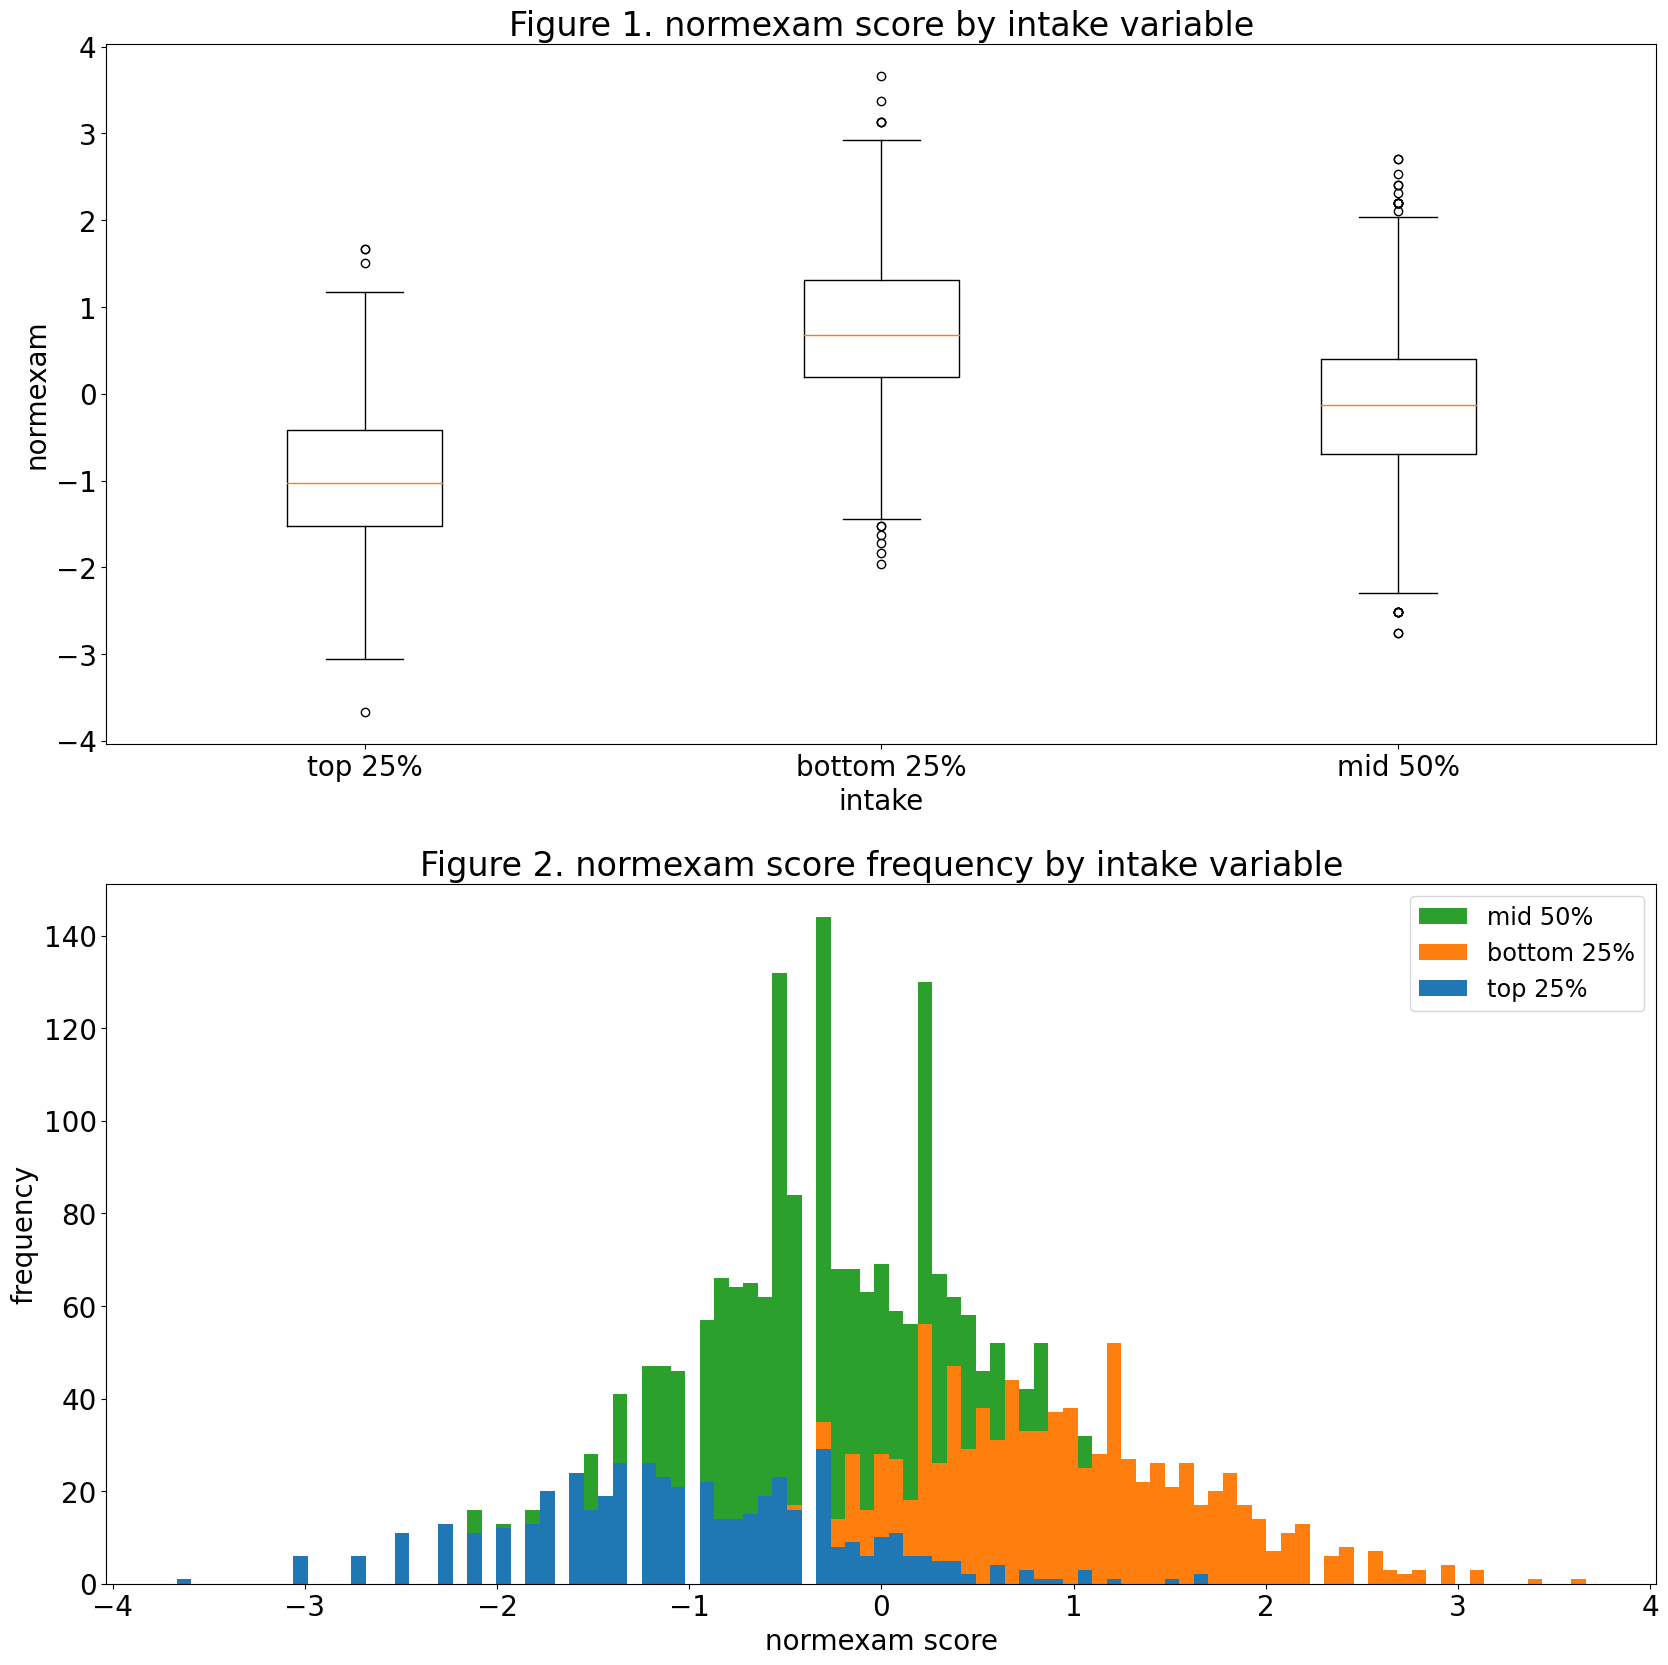

In [7]:
fig, ax = plt.subplots(2,1,figsize=(20, 20))

data = [df_school_student_data["normexam"].loc[df_school_student_data['intake'].isin(["top 25%"])],
        df_school_student_data["normexam"].loc[df_school_student_data['intake'].isin(["bottom 25%"])],
        df_school_student_data["normexam"].loc[df_school_student_data['intake'].isin(["mid 50%"])]]
label_data = ["top 25%", "bottom 25%", "mid 50%"]

ax[0].boxplot(data)
ax[0].set_xticklabels(label_data)
ax[0].set_xlabel("intake", fontsize = 20)
ax[0].set_ylabel("normexam", fontsize = 20)
ax[0].set_title( "Figure 1. normexam score by intake variable" , size = 24 )
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].hist(data, label=label_data, bins = "stone", histtype="stepfilled")
ax[1].set_xlabel("normexam score", fontsize = 20)
ax[1].set_ylabel("frequency", fontsize = 20)
ax[1].set_title( "Figure 2. normexam score frequency by intake variable" , size = 24 )
ax[1].legend(fontsize="xx-large")
ax[1].tick_params(axis='both', which='major', labelsize=20)

Algumas observações:
* Segundo a Figura 2, os alunos dentro da categoria bottom 25% da variável intake obtiveram uma melhor média na nota do normexam. Para complementar, na Figura 1 tem-se uma variabilidade dos dados semelhante para cada característica (top 25%, bottom 25% e mid 50%), porém a mediana de bottom 25% se encontra em uma posição superior.
* É possível criar a hipótese de que **os alunos dentro da categoria bottom 25% da nota do intake podem ter um desempenho melhor no normexam.**

### sex x normexam

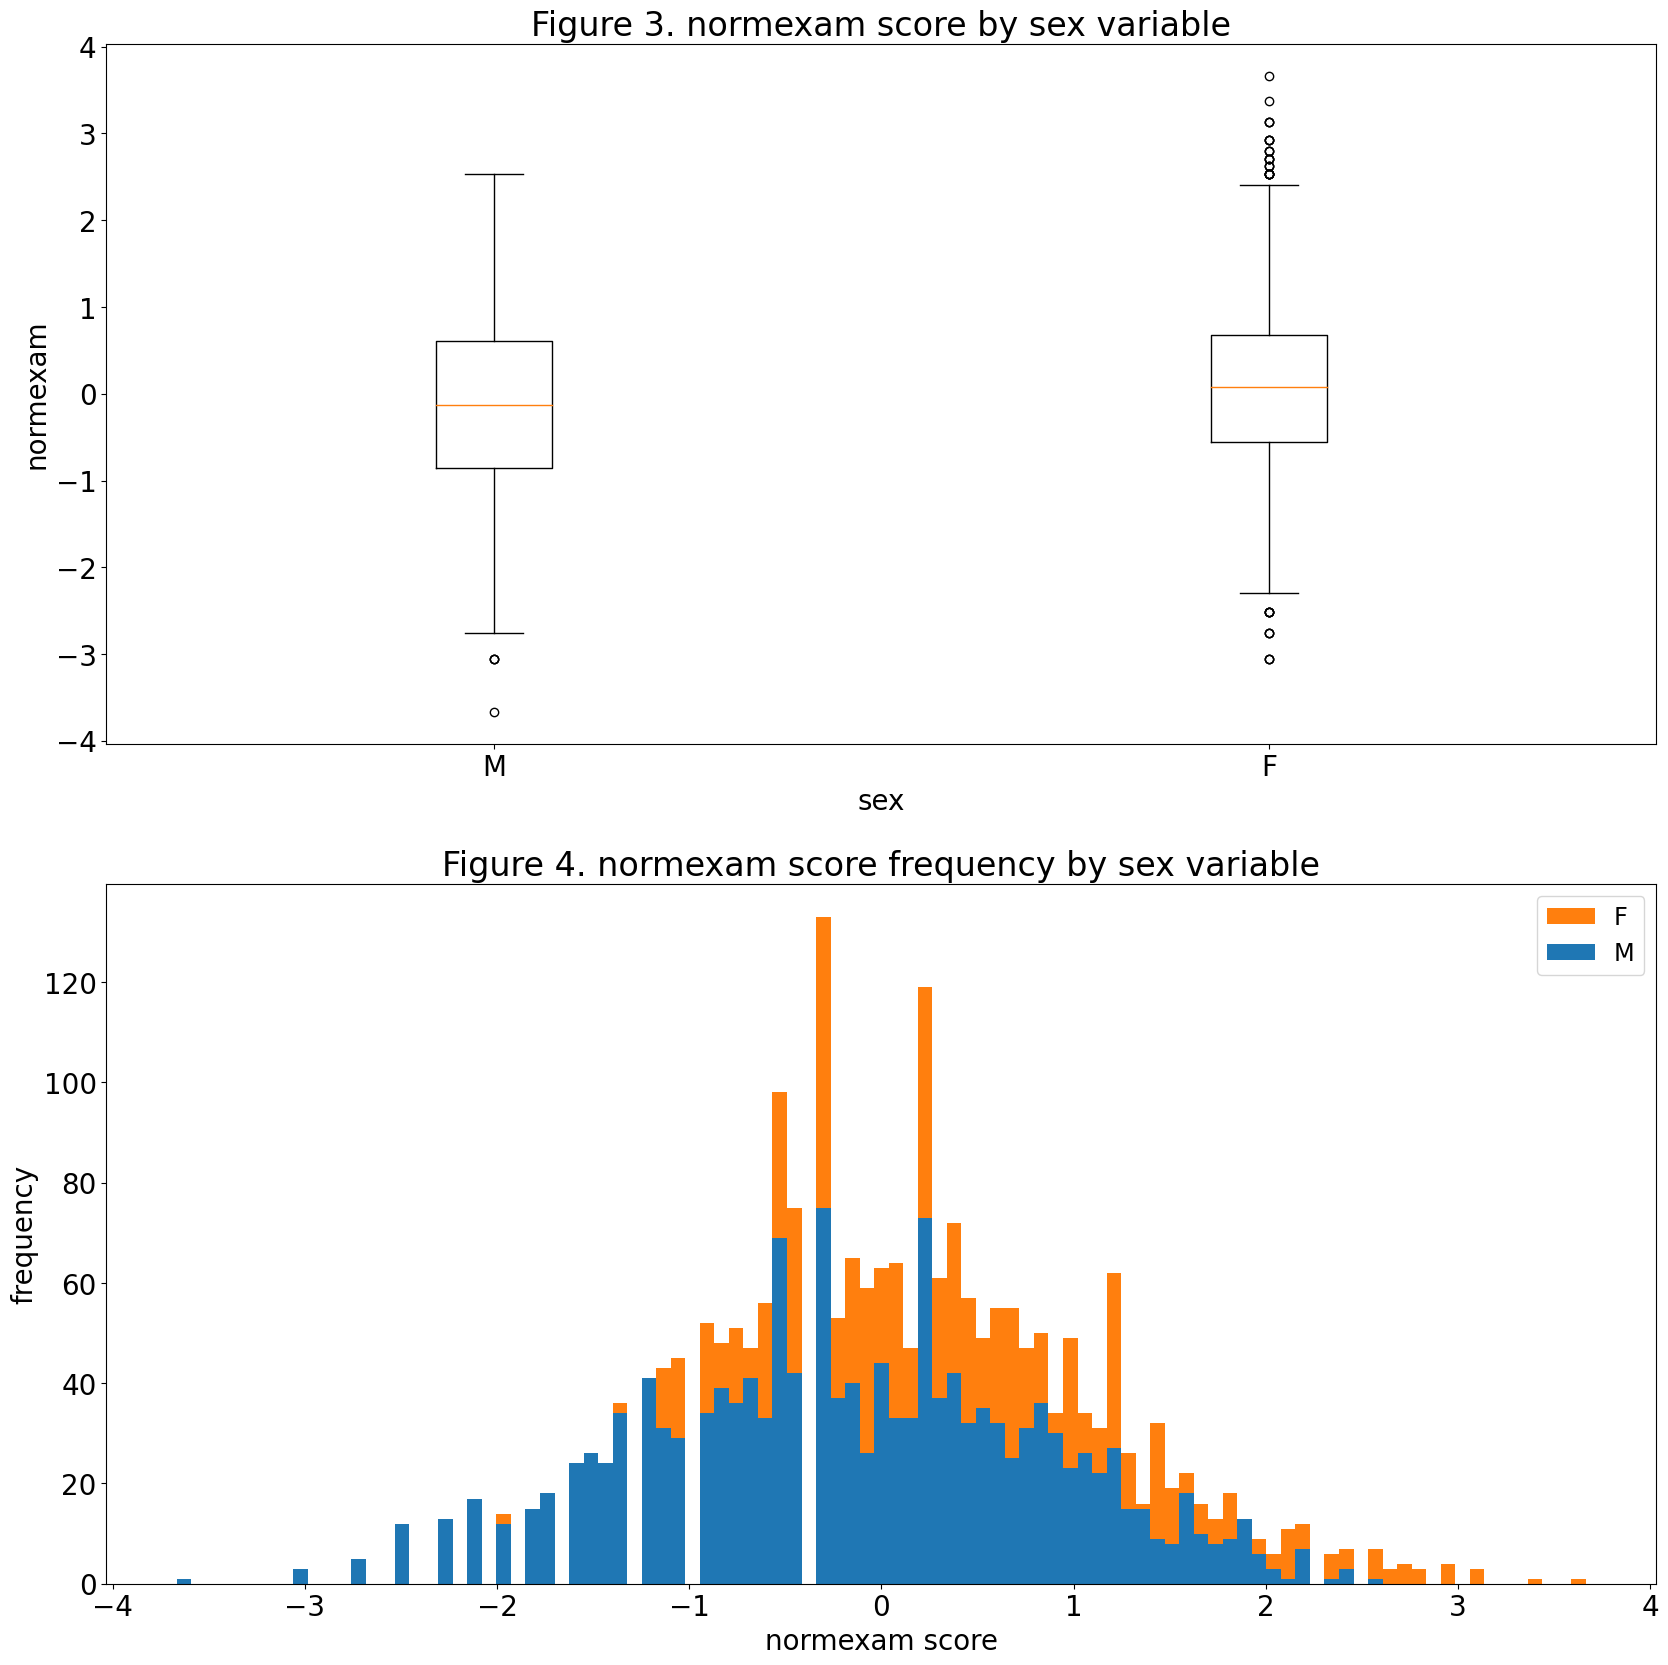

In [8]:
fig, ax = plt.subplots(2,1,figsize=(20, 20))

data = [df_school_student_data["normexam"].loc[df_school_student_data['sex'].isin(["M"])],
        df_school_student_data["normexam"].loc[df_school_student_data['sex'].isin(["F"])]]
label_data = ["M", "F"]

ax[0].boxplot(data)
ax[0].set_xticklabels(label_data)
ax[0].set_xlabel("sex", fontsize = 20)
ax[0].set_ylabel("normexam", fontsize = 20)
ax[0].set_title( "Figure 3. normexam score by sex variable" , size = 24 )
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].hist(data, label=label_data, bins = "stone", histtype="stepfilled")
ax[1].set_xlabel("normexam score", fontsize = 20)
ax[1].set_ylabel("frequency", fontsize = 20)
ax[1].set_title( "Figure 4. normexam score frequency by sex variable" , size = 24 )
ax[1].legend(fontsize="xx-large")
ax[1].tick_params(axis='both', which='major', labelsize=20)

Algumas observações:
* Segundo a Figura 4, na média os alunos do sexo feminino e masculino apresentaram o mesmo comportamento. Porém a Figura 3 demonstra como os alunos do sexo feminino tem uma maior distribuição dentro desta média de nota, com a maior parte dos outliers acima do valor máximo. Além disso, os outliers dos alunos do sexo masculino se encontram abaixo do valor mínimo, supondo assim que uma maior quantidade de alunos do sexo masculino pode aproximar a dispersão para próximo do primeiro quartil.
* Logo, é possível criar a hipótese de que **os alunos do sexo feminino podem ter um desempenho melhor na nota do normexam.**

### vr x normexam

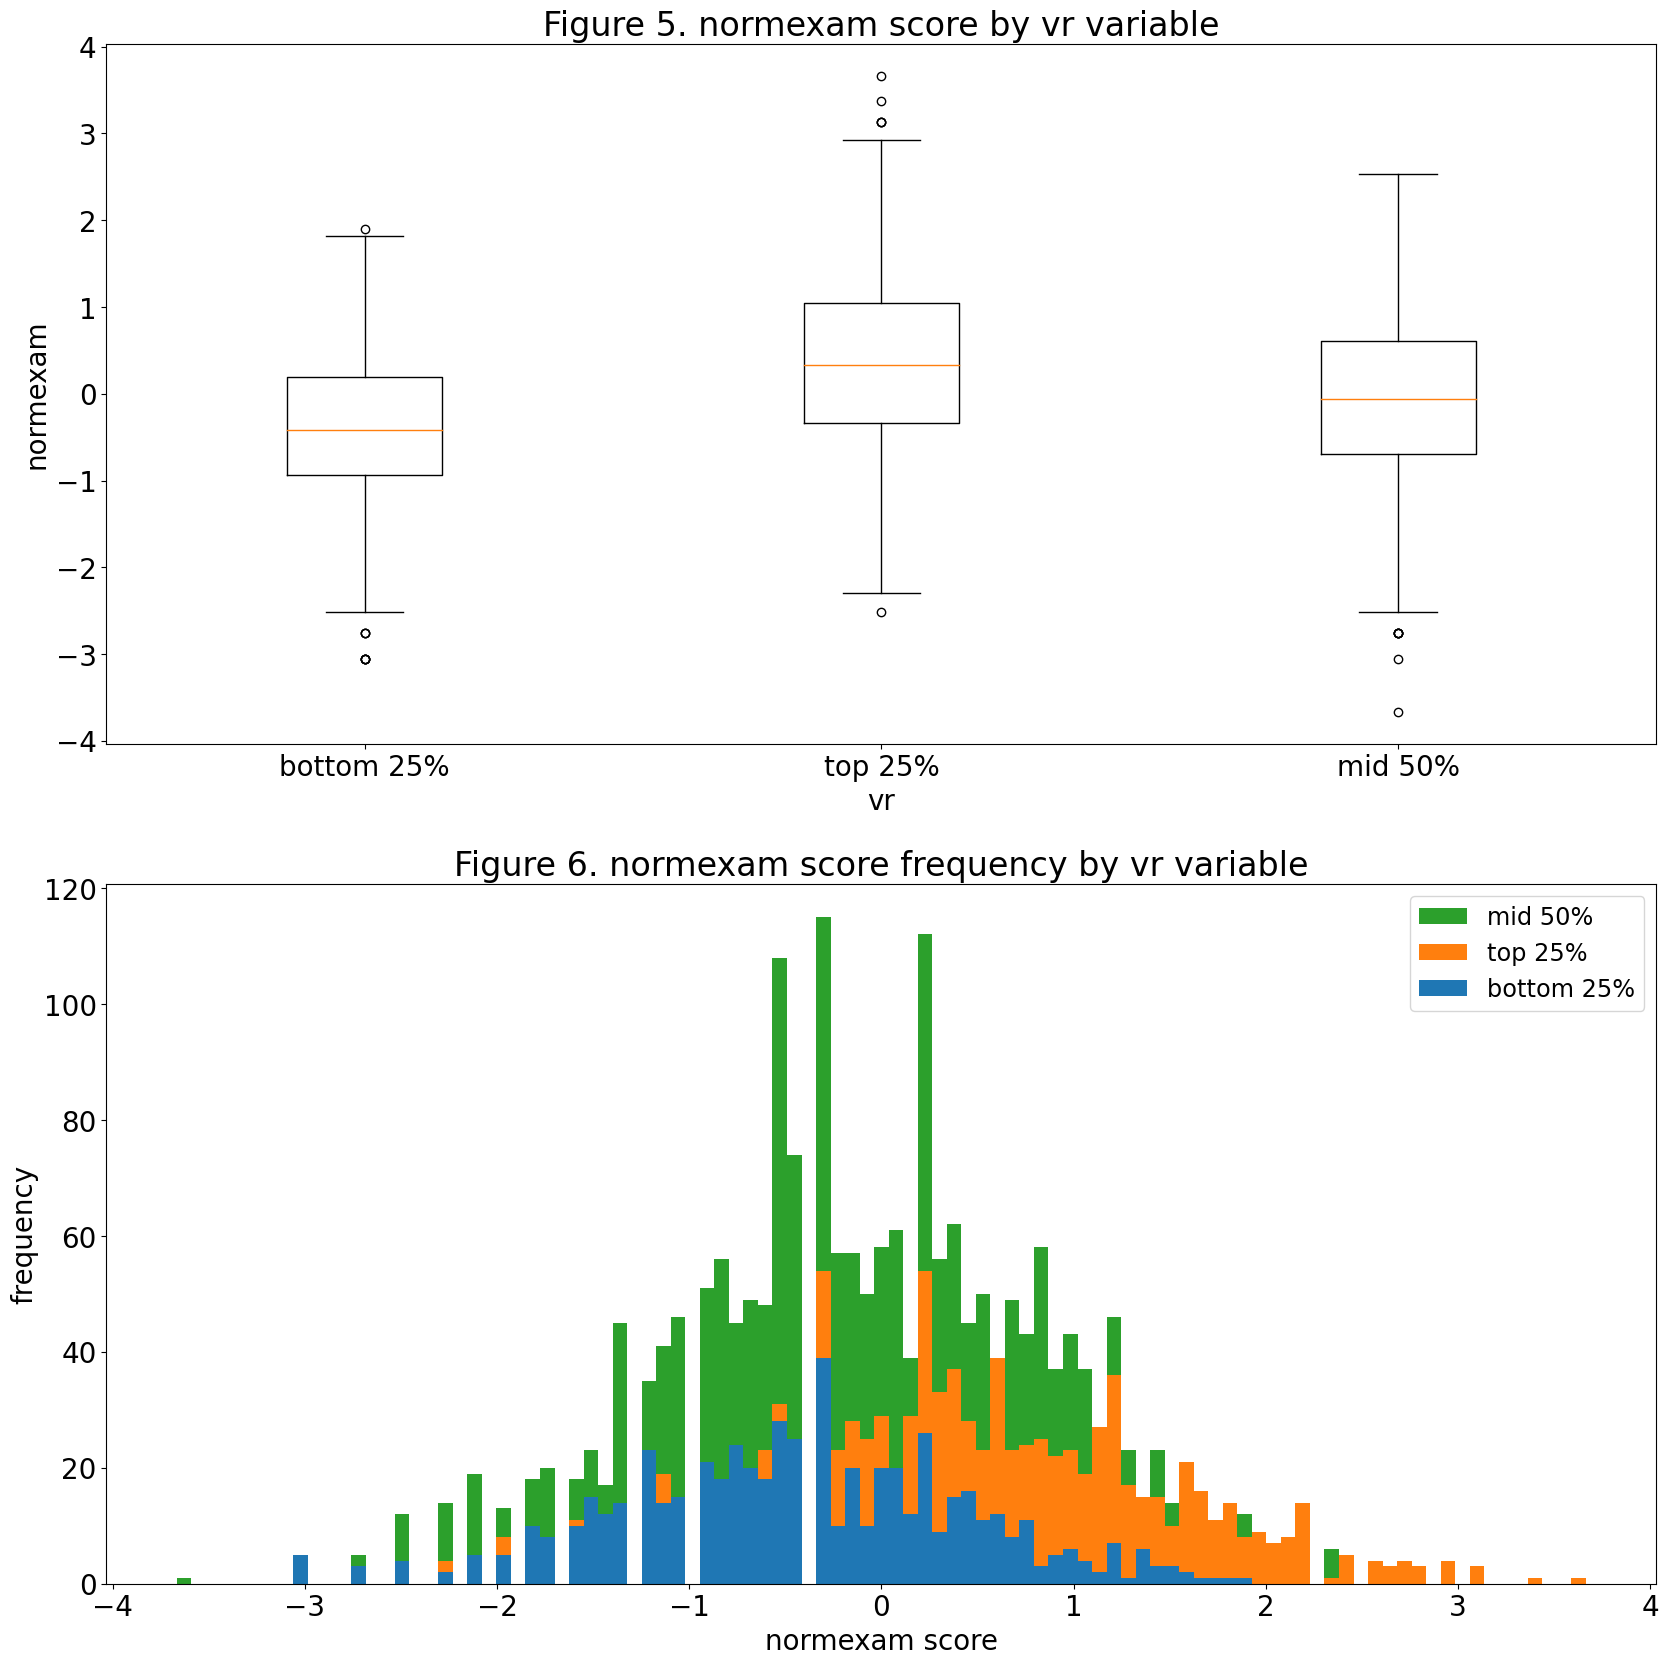

In [9]:
fig, ax = plt.subplots(2,1,figsize=(20, 20))

data = [df_school_student_data["normexam"].loc[df_school_student_data['vr'].isin(["bottom 25%"])],
        df_school_student_data["normexam"].loc[df_school_student_data['vr'].isin(["top 25%"])],
        df_school_student_data["normexam"].loc[df_school_student_data['vr'].isin(["mid 50%"])]]
label_data = ["bottom 25%", "top 25%", "mid 50%"]

ax[0].boxplot(data)
ax[0].set_xticklabels(label_data)
ax[0].set_xlabel("vr", fontsize = 20)
ax[0].set_ylabel("normexam", fontsize = 20)
ax[0].set_title( "Figure 5. normexam score by vr variable" , size = 24 )
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].hist(data, label=label_data, bins = "stone", histtype="stepfilled")
ax[1].set_xlabel("normexam score", fontsize = 20)
ax[1].set_ylabel("frequency", fontsize = 20)
ax[1].set_title( "Figure 6. normexam score frequency by vr variable" , size = 24 )
ax[1].legend(fontsize="xx-large")
ax[1].tick_params(axis='both', which='major', labelsize=20)

Algumas observações:
* Segundo a Figura 6, os alunos dentro da categoria top 25% da variável vr obtiveram uma melhor média na nota do normexam. Isto também pode ser visto pela Figura 5, onde há alguns outliers acima do valor máximo para a categoria top 25%, indicando que uma maior quantidade de dados pode alocar a distribuição para próximo do terceiro quartil, e sua mediana é superior em relação às outras categorias (bottom 25% e mid 50%).
* Portanto, é possível criar a hipótese de que **os alunos dentro da categoria top 25% da nota do vr podem ter um desempenho melhor no normexam.**

### type x normexam

Média da nota do normexam para escolas tipo Sngl: 0.1118965447276941
Média da nota do normexam para escolas tipo Mxd: -0.09282638563480022


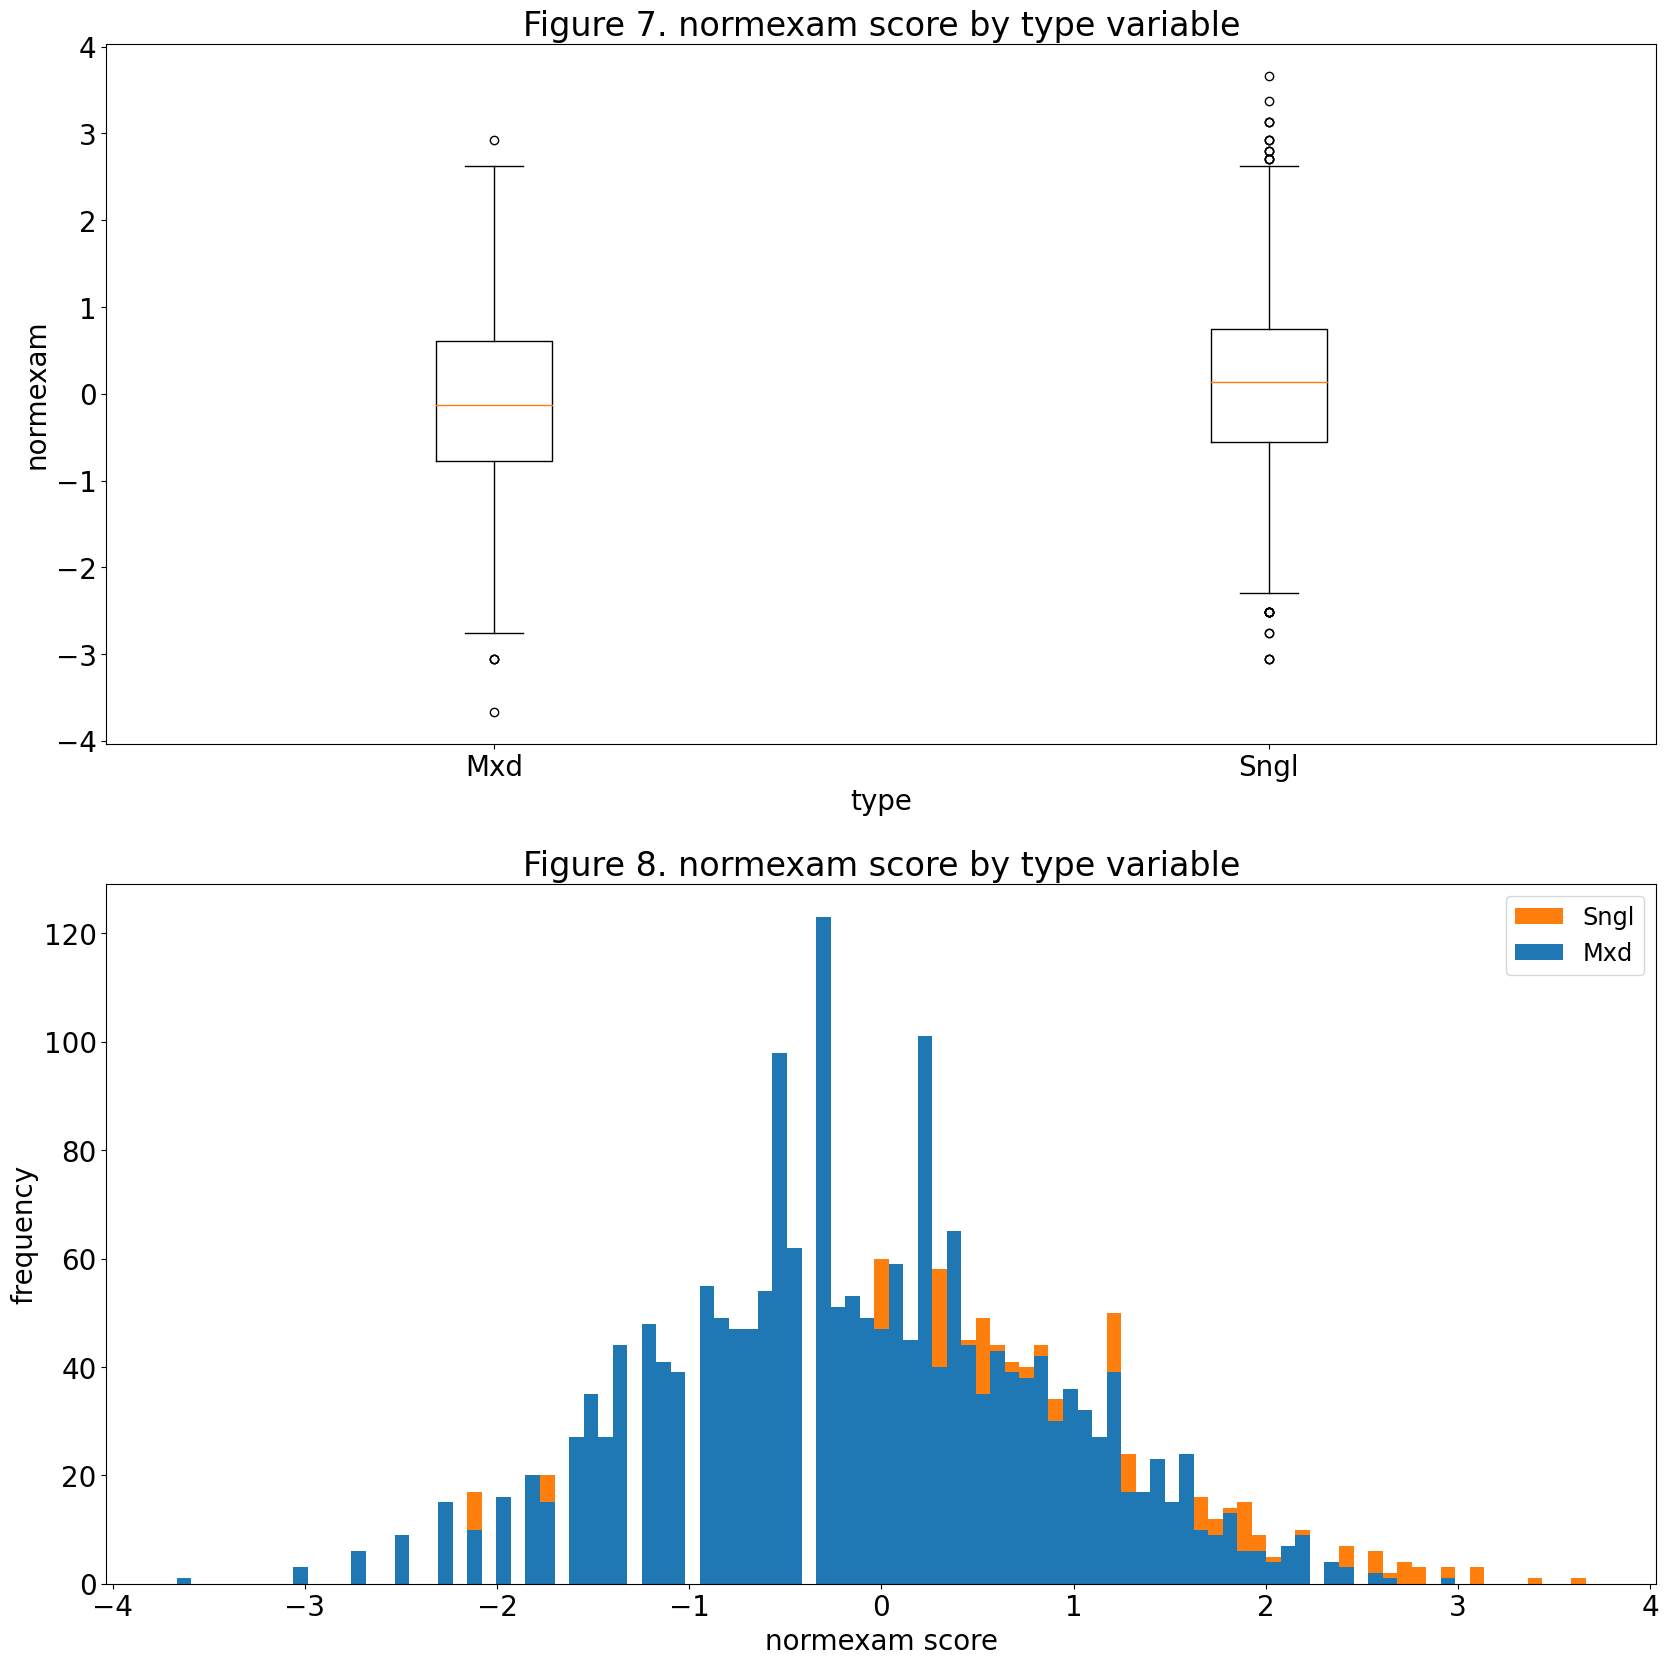

In [14]:
fig, ax = plt.subplots(2,1,figsize=(20, 20))

data = [df_school_student_data["normexam"].loc[df_school_student_data['type'].isin(["Mxd"])], 
        df_school_student_data["normexam"].loc[df_school_student_data['type'].isin(["Sngl"])]]
label_data = ["Mxd", "Sngl"]

ax[0].boxplot(data)
ax[0].set_xticklabels(label_data)
ax[0].set_xlabel("type", fontsize = 20)
ax[0].set_ylabel("normexam", fontsize = 20)
ax[0].set_title( "Figure 7. normexam score by type variable" , size = 24 )
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].hist(data, label=label_data, bins = "stone", histtype="stepfilled")
ax[1].set_xlabel("normexam score", fontsize = 20)
ax[1].set_ylabel("frequency", fontsize = 20)
ax[1].set_title( "Figure 8. normexam score by type variable" , size = 24 )
ax[1].legend(fontsize="xx-large")
ax[1].tick_params(axis='both', which='major', labelsize=20)

print("Média da nota do normexam para escolas tipo Sngl: "+ str(data[1].mean()))
print("Média da nota do normexam para escolas tipo Mxd: "+ str(data[0].mean()))

Algumas observações:
* Conforme demonstrado tanto pela Figura 8 quanto pela Figura 7, apesar de ser uma diferença bem pequena, as escolas de gênero único apresentam uma média (de 0.111896) e mediana superiores em relação às escolas de gênero misto (com média de -0.092826). Na Figura 7 fica mais visível esta suposição, onde que a mediana das notas para a escola de gênero único se encontra acima do eixo zero, com alguns outliers identificados acima do valor máximo.
* Assim, é possível criar a hipótese de que **o tipo da escola interfere no desempenho das notas do normexam.**

### schgend x normexam

Média da nota do normexam para escolas masculinas: 0.0295396774468085
Média da nota do normexam para escolas femininas: 0.14271479920382163
Média da nota do normexam para escolas mixas: -0.09282638563480022


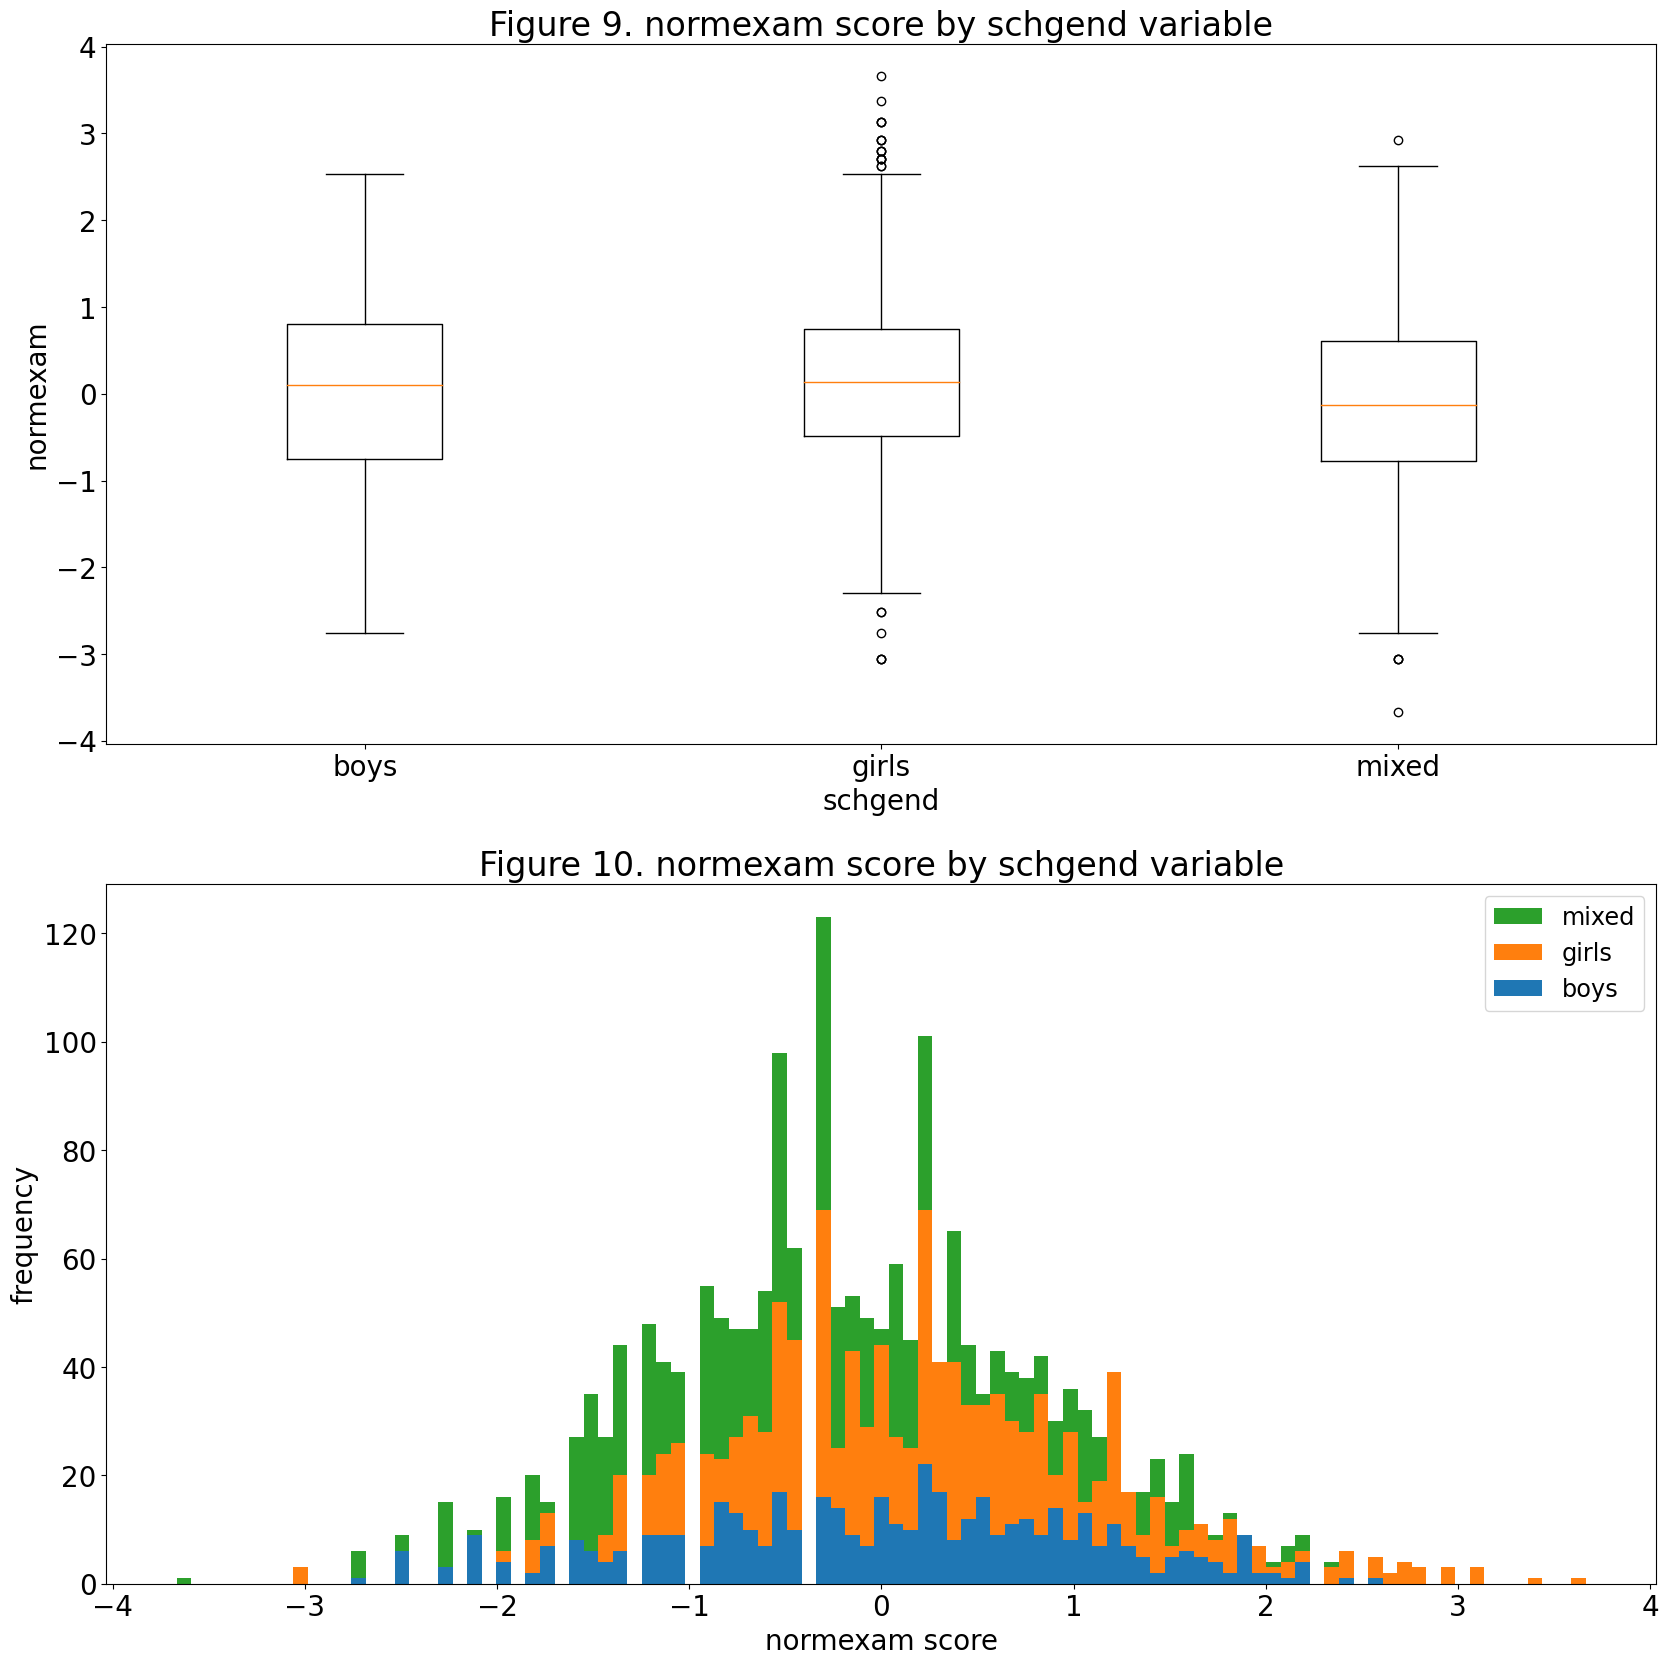

In [15]:
fig, ax = plt.subplots(2,1,figsize=(20, 20))

data = [df_school_student_data["normexam"].loc[df_school_student_data['schgend'].isin(["boys"])],
        df_school_student_data["normexam"].loc[df_school_student_data['schgend'].isin(["girls"])],
        df_school_student_data["normexam"].loc[df_school_student_data['schgend'].isin(["mixed"])]]
label_data = ["boys", "girls", "mixed"]

ax[0].boxplot(data)
ax[0].set_xticklabels(label_data)
ax[0].set_xlabel("schgend", fontsize = 20)
ax[0].set_ylabel("normexam", fontsize = 20)
ax[0].set_title( "Figure 9. normexam score by schgend variable" , size = 24 )
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].hist(data, label=label_data, bins = "stone", histtype="stepfilled")
ax[1].set_xlabel("normexam score", fontsize = 20)
ax[1].set_ylabel("frequency", fontsize = 20)
ax[1].set_title( "Figure 10. normexam score by schgend variable" , size = 24 )
ax[1].legend(fontsize="xx-large")
ax[1].tick_params(axis='both', which='major', labelsize=20)

print("Média da nota do normexam para escolas masculinas: "+ str(data[0].mean()))
print("Média da nota do normexam para escolas femininas: "+ str(data[1].mean()))
print("Média da nota do normexam para escolas mixas: "+ str(data[2].mean()))

Algumas observações:
* Complementando o resultado observado pelas Figuras 7 e 8, tanto a Figura 10 quanto a Figura 9 indicam visualmente a tendência das escolas de gênero masculino (com média de 0.029540) e feminino (com média de 0.142715) de possuirem nota no normexam maior em relação às escolas de gênero misto (com média de -0.092826).
* Assim, é possível criar a hipótese de que **o gênero da escola pode interferir no desempenho das notas do normexam.**

### schavg x normexam

C:\Users\Technolog\AppData\Local\Temp\ipykernel_6108\2209293854.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_school_student_data.corr(method='pearson'), annot = True, fmt=".3f", linewidths=.6, vmin=-1, vmax=1)


Text(0.5, 1.0, 'Figure 11. Correlation between variables\n')

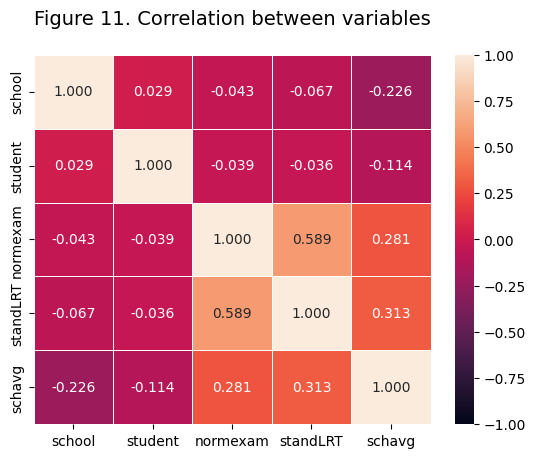

In [16]:
sns.heatmap(df_school_student_data.corr(method='pearson'), annot = True, fmt=".3f", linewidths=.6, vmin=-1, vmax=1)
plt.title('Figure 11. Correlation between variables\n', fontsize = 14)

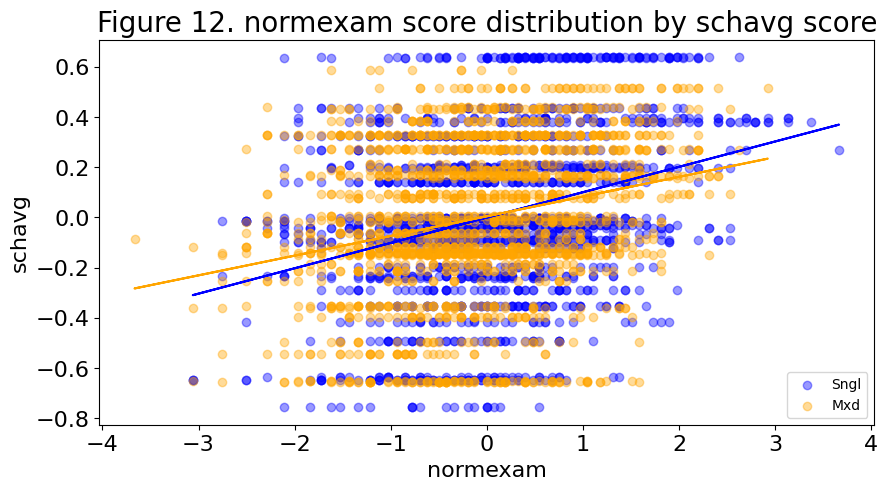

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

data_normexam = [df_school_student_data["normexam"].loc[df_school_student_data['type'].isin(["Sngl"])],
                 df_school_student_data["normexam"].loc[df_school_student_data['type'].isin(["Mxd"])]]
data_schavg = [df_school_student_data["schavg"].loc[df_school_student_data['type'].isin(["Sngl"])],
               df_school_student_data["schavg"].loc[df_school_student_data['type'].isin(["Mxd"])]]
label_data = ["Sngl", "Mxd"]

m1,b1 = np.polyfit(data_normexam[0],data_schavg[0], 1)
m2,b2 = np.polyfit(data_normexam[1],data_schavg[1], 1)

ax.scatter(data_normexam[0], data_schavg[0], alpha=0.4, color = "blue")
ax.scatter(data_normexam[1], data_schavg[1], alpha=0.4, color = "orange")
ax.set_xlabel("normexam", fontsize = 16)
ax.set_ylabel("schavg", fontsize = 16)
ax.set_title( "Figure 12. normexam score distribution by schavg score" , size = 20 )
ax.tick_params(axis='both', which='major', labelsize=16)
ax.plot(data_normexam[0], m1*data_normexam[0]+b1, color="blue")
ax.plot(data_normexam[1], m2*data_normexam[1]+b2, color="orange")

ax.legend(label_data, loc='lower right')

Algumas observações:
* É possível observar pela Figura 11 que há uma correlação positiva fraca de 0,281 entre as variáveis schavg e normexam. Isso significa que não é possível levantar qualquer hipótese a respeito de alguma relação numérica entre estas variáveis.
* Assim, é possível criar a hipótese de que **a nota da variável schavg não interfere no desempenho das notas do normexam.**

### standLRT x normexam

C:\Users\Technolog\AppData\Local\Temp\ipykernel_6108\1689023922.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_school_student_data.corr(method='pearson'), annot = True, fmt=".3f", linewidths=.6, vmin=-1, vmax=1)


Text(0.5, 1.0, 'Figure 13. Correlation between variables\n')

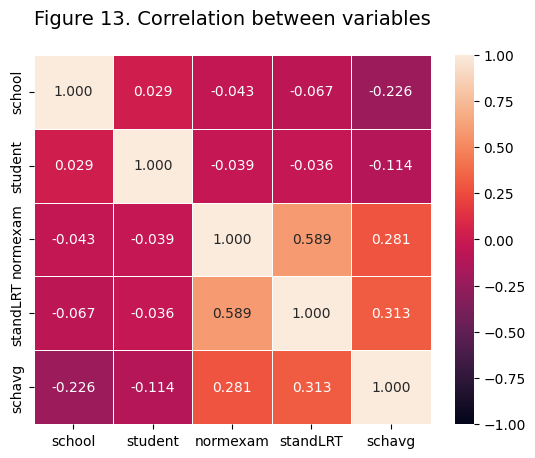

In [18]:
sns.heatmap(df_school_student_data.corr(method='pearson'), annot = True, fmt=".3f", linewidths=.6, vmin=-1, vmax=1)
plt.title('Figure 13. Correlation between variables\n', fontsize = 14)

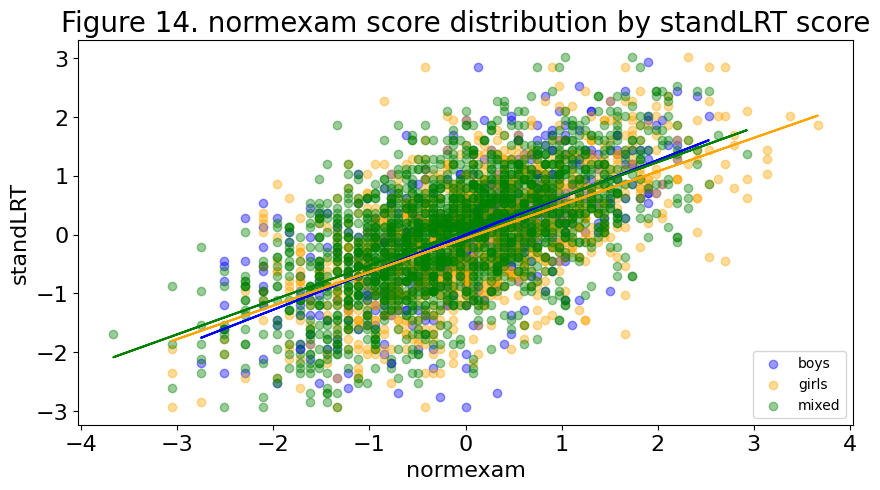

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

data_normexam = [df_school_student_data["normexam"].loc[df_school_student_data['schgend'].isin(["boys"])],
                df_school_student_data["normexam"].loc[df_school_student_data['schgend'].isin(["girls"])],
                df_school_student_data["normexam"].loc[df_school_student_data['schgend'].isin(["mixed"])]]
data_standLRT = [df_school_student_data["standLRT"].loc[df_school_student_data['schgend'].isin(["boys"])],
                df_school_student_data["standLRT"].loc[df_school_student_data['schgend'].isin(["girls"])],
                df_school_student_data["standLRT"].loc[df_school_student_data['schgend'].isin(["mixed"])]]
label_data = ["boys", "girls", "mixed"]

m1,b1 = np.polyfit(data_normexam[0],data_standLRT[0], 1)
m2,b2 = np.polyfit(data_normexam[1],data_standLRT[1], 1)
m3,b3 = np.polyfit(data_normexam[2],data_standLRT[2], 1)

ax.scatter(data_normexam[0], data_standLRT[0], alpha=0.4, color = "blue")
ax.scatter(data_normexam[1], data_standLRT[1], alpha=0.4,  color = "orange")
ax.scatter(data_normexam[2], data_standLRT[2], alpha=0.4,  color = "green")
ax.set_xlabel("normexam", fontsize = 16)
ax.set_ylabel("standLRT", fontsize = 16)
ax.set_title( "Figure 14. normexam score distribution by standLRT score" , size = 20 )
ax.tick_params(axis='both', which='major', labelsize=16)

ax.plot(data_normexam[0], m1*data_normexam[0]+b1, color="blue")
ax.plot(data_normexam[1], m2*data_normexam[1]+b2, color="orange")
ax.plot(data_normexam[2], m3*data_normexam[2]+b3, color="green")
ax.legend(label_data, loc='lower right')

Algumas observações:
* É possível observar pela Figura 13 que há uma correlação positiva moderada de 0,589 entre as variáveis standLRT e normexam. Dessa forma, pode-se levantar uma hipótese a respeito da influência da nota no standLRT sobre a nota do normexam. Tal fato é complementado pela Figura 14, onde anteriormente foi observado que as escolas do gênero feminino tinham a maior média no normexam, de certo modo este gênero predomina nesta análise pois uma nota alta no standLRT influência em uma nota alta também no normexam em relação aos outros gêneros de escola (linha de regressão em amarelo).
* Assim, é possível criar a hipótese de que **as notas da variável standLRT podem interfer no desempenho das notas do normexam.**

## 5. Hipóteses levantadas

**1. Os alunos dentro da categoria bottom 25% da nota do intake podem ter um desempenho melhor no normexam.  
2. Os alunos do sexo feminino podem ter um desempenho melhor na nota do normexam.  
3. Os alunos dentro da categoria top 25% da nota do vr podem ter um desempenho melhor no normexam.  
4. O tipo da escola pode interferir no desempenho das notas do normexam, com melhor resultado para Sngl.  
5. O gênero da escola pode interferir no desempenho das notas do normexam, com melhor resultado para girls.  
6. A nota da variável schavg não interfere no desempenho das notas do normexam.  
7. A nota da variável standLRT pode interferir no desempenho das notas do normexam, com melhor resultado para escolas do gênero feminino**

## 6. Construção do modelo e treino

* O objetivo deste modelo é prever quais dos tipos de gêneros escolares é mais eficiente na formação dos alunos segundo a nota do normexam

## 7. Testes e demonstração dos resultados